In [1]:
from IPython.display import display, HTML
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib as mlp
import matplotlib.pyplot as plt
import geopandas as gp
import seaborn as sb
import os

%matplotlib inline
plt.style.use('ggplot')


In [18]:
plt.rcParams["figure.facecolor"] = "w"


In [2]:
#sys.path.append('../../../core/')
os.chdir("../../../core")
import GT_helper_functions as hf
import GT_load_data as data

base_dir = "../../Outcome Measurement Data/MALARIA/"

C:\Users\Guillermo\PCE\gf\core\GT_helper_functions.py:15: RuntimeWarning: overflow encountered in power
  .divide(np.power(munisGT.Poblacion2012,1/2012)), 2010*2012/(2012-2010))
C:\Users\Guillermo\PCE\gf\core\GT_helper_functions.py:18: RuntimeWarning: divide by zero encountered in log
  munisGT["k_10_12"] = np.log(munisGT.Poblacion2012.divide(munisGT.P_10_12))/2012
C:\Users\Guillermo\PCE\gf\core\GT_helper_functions.py:19: RuntimeWarning: divide by zero encountered in log
  munisGT["k_12_15"] = np.log(munisGT.Poblacion2015.divide(munisGT.P_12_15))/2015


In [3]:
# Esto no incluye toda las áreas del país. Sólo las áreas vistas en la base de datos de notifs.
notifs_das2depto = {
    "Escuintla": 5,
    "Alta Verapaz": 16,
    "Izabal" : 18,
    "Suchitepéquez" : 10,
    "Santa Rosa" : 6,
    "Retalhuleu" : 11,
    "Petén Norte" : 17,
    "Petén SurOccidental" : 17,
    "Huehuetenango" : 13,
    "Quiché" : 14,
    "Petén Sur Oriental" : 17,
    "Baja Verapaz" : 15,
    "Sololá" : 7,
    "Zacapa" : 18,
    "Ixcán" : 14,
    "San Marcos" : 12,
    "Chimaltenango" : 4,
    "Guatemala Central" : 1,
    "Guatemala Sur" : 1,
    "Ixil" : 14,
    "Jutiapa" : 22,
    "Chiquimula" : 20,
    "Ixcan" : 14,
    "El Progreso" : 2,
    "Guatemala Nororiental" : 1,
    "Quetzaltenango" : 9,
}

In [4]:
deptos = gp.read_file("../../Covariates and Other Data/GIS/GT-IGN-cartografia_basica-Departamentos.geojson")
deptos = deptos[lambda x: x.CODIGO.astype(int) <= 2200]

In [5]:
bednets = pd.read_csv(base_dir + "GTM - Bednets Distr_1.tar.gz", index_col = 0 )

C:\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [6]:
notifs = pd.read_excel(base_dir + "Base de datos 2016 - 2018 NAD Consolidado 04.06.xlsx")


In [7]:
bednetsYears = bednets.groupby(["year", "CodDepto_e"]).Pabellones.sum().unstack(0).fillna(0)
bednetsYears

year,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0
CodDepto_e,,,,,,,
2.0,0.0,0.0,0.0,5137.0,0.0,0.0,0.0
4.0,0.0,0.0,0.0,5000.0,346.0,0.0,0.0
5.0,315925.0,63305.0,127630.0,375675.0,125124.0,40000.0,17309.0
6.0,0.0,0.0,11907.0,17330.0,18250.0,0.0,0.0
7.0,0.0,0.0,0.0,18210.0,3872.0,422.0,0.0
9.0,0.0,0.0,0.0,23337.0,34497.0,446.0,4090.0
10.0,191385.0,142365.0,0.0,170166.0,139934.0,59.0,0.0
11.0,29615.0,28312.0,0.0,45595.0,74900.0,0.0,27937.0
12.0,38974.0,40882.0,100.0,49954.0,20518.0,0.0,0.0


In [9]:
notifs["deptocode"] = notifs.AREA.map(str.strip).map(notifs_das2depto.get)

In [10]:
notifsYear = notifs.groupby(["Año", "deptocode"]).AREA.count().unstack(0).fillna(0)
notifsYear

Año,1900.0,2014.0,2015.0,2016.0,2017.0,2018.0
deptocode,,,,,,
1,0.0,0.0,3.0,11.0,13.0,0.0
2,0.0,0.0,2.0,0.0,2.0,0.0
4,0.0,0.0,12.0,3.0,2.0,0.0
5,5.0,1.0,3589.0,3194.0,2437.0,878.0
6,0.0,2.0,71.0,149.0,37.0,8.0
7,0.0,0.0,16.0,10.0,1.0,0.0
9,0.0,0.0,3.0,0.0,0.0,0.0
10,1.0,0.0,152.0,241.0,300.0,114.0
11,0.0,0.0,105.0,75.0,34.0,9.0


In [11]:
incidence = notifsYear.stack().rename("notifs").reset_index()
incidence["Population"] = incidence.apply(lambda x: 
                                          hf.GTDeptoPopulation(x.deptocode, x["Año"]), 1)

In [12]:
incidence["incidence"] = incidence.notifs/incidence.Population

In [13]:
incidence = incidence[incidence["Año"]>2014]
incidence = incidence.rename(columns={"Año":  "Year"}).pivot_table(values = "incidence", index = "deptocode",
                                           columns="Year")

In [67]:
bednetsYears

year,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0
CodDepto_e,,,,,,,
2.0,0.0,0.0,0.0,5137.0,0.0,0.0,0.0
4.0,0.0,0.0,0.0,5000.0,346.0,0.0,0.0
5.0,315925.0,63305.0,127630.0,375675.0,125124.0,40000.0,17309.0
6.0,0.0,0.0,11907.0,17330.0,18250.0,0.0,0.0
7.0,0.0,0.0,0.0,18210.0,3872.0,422.0,0.0
9.0,0.0,0.0,0.0,23337.0,34497.0,446.0,4090.0
10.0,191385.0,142365.0,0.0,170166.0,139934.0,59.0,0.0
11.0,29615.0,28312.0,0.0,45595.0,74900.0,0.0,27937.0
12.0,38974.0,40882.0,100.0,49954.0,20518.0,0.0,0.0


/home/guillermo/.local/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log10
  import sys


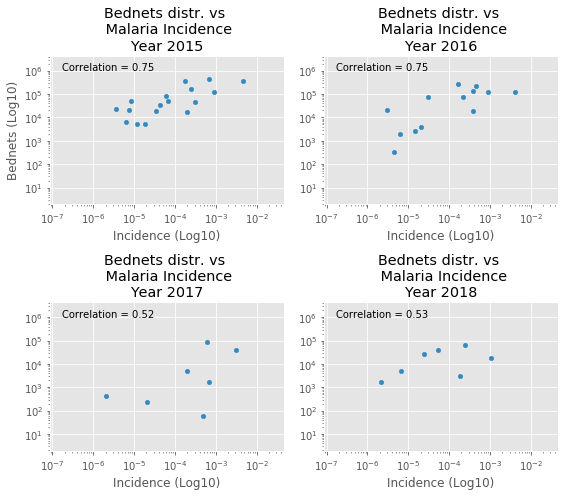

In [328]:
ymax = bednetsYears.max().max()
xmax = notifsYear.max().max()

def plotNotifsVsBednets(ax, year = 2015, ylabel = True):
    temp = pd.DataFrame(data = [bednetsYears[year], incidence[year]]).T.fillna(0)
    #temp = np.log10(temp)
    corr = np.round(np.log10(temp).corr().values[0][1], 2)
    temp.columns = ["Bednets (Log10)", "Incidence (Log10)"]
    ax.set_yscale("log", basey=10)
    ax.set_xscale("log", basex=10)
    temp.plot.scatter("Incidence (Log10)", "Bednets (Log10)",
                      title="Bednets distr. vs \n Malaria Incidence\nYear "+ str(year),
                          ax = ax)
    plt.text(0.05,0.9, "Correlation = "+str(corr), transform=ax.transAxes)
    if ylabel == False:
        ax.set_ylabel("")

mlp.rcParams['figure.figsize'] = [8.0, 7.0]
fig, axes = plt.subplots(2,2)
xlims = (np.min(list(filter(lambda x: x>0, incidence.values.flatten())))/10, 
                np.max(incidence.values.flatten())*10)
ylims = (np.min(list(filter(lambda x: x>0, bednetsYears.values.flatten())))/10, 
                np.max(bednetsYears.values.flatten())*10)
    
plotNotifsVsBednets(axes[0][0], 2015)
plotNotifsVsBednets(axes[0][1], 2016, False)
plotNotifsVsBednets(axes[1][0], 2017, False)
plotNotifsVsBednets(axes[1][1], 2018, False)
for row in axes:
    for ax in row:
        ax.set_xlim(xlims[0], xlims[1])
        ax.set_ylim(ylims[0], ylims[1])
plt.tight_layout()

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log10
  import sys


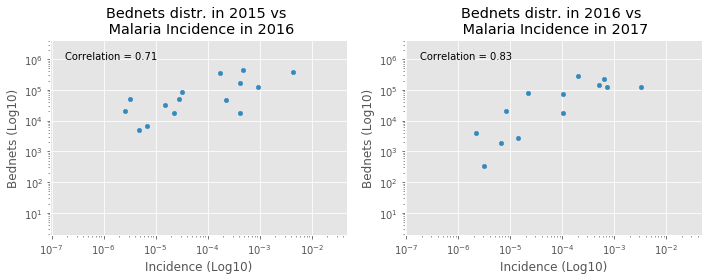

In [84]:
ymax = bednetsYears.max().max()
xmax = notifsYear.max().max()

def plotNotifsVsBednets(ax, year = 2015, ylabel = True):
    temp = pd.DataFrame(data = [bednetsYears[year-1], incidence[year]]).T.fillna(0)
    #temp = np.log10(temp)
    corr = np.round(np.log10(temp).corr().values[0][1], 2)
    temp.columns = ["Bednets (Log10)", "Incidence (Log10)"]
    ax.set_yscale("log", basey=10)
    ax.set_xscale("log", basex=10)
    temp.plot.scatter("Incidence (Log10)", "Bednets (Log10)",
                      title="Bednets distr. in "+str(year-1)+" vs \n Malaria Incidence in "+ str(year),
                          ax = ax)
    plt.text(0.05,0.9, "Correlation = "+str(corr), transform=ax.transAxes)
    if ylabel == False:
        ax.set_ylabel("")

mlp.rcParams['figure.figsize'] = [10.0, 4.0]
fig, axes = plt.subplots(1,2)
xlims = (np.min(list(filter(lambda x: x>0, incidence.values.flatten())))/10, 
                np.max(incidence.values.flatten())*10)
ylims = (np.min(list(filter(lambda x: x>0, bednetsYears.values.flatten())))/10, 
                np.max(bednetsYears.values.flatten())*10)
    

plotNotifsVsBednets(axes[0], 2016, True)
plotNotifsVsBednets(axes[1], 2017, True)
for ax in axes:
    ax.set_xlim(xlims[0], xlims[1])
    ax.set_ylim(ylims[0], ylims[1])
plt.tight_layout()

In [82]:
axes

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000001A9006A0>,
      dtype=object)

In [250]:
pblYears = bednetsYears.divide(1000).reset_index()\
                         .assign(deptocode=lambda x: (x.CodDepto_e * 100).astype(int).astype(str)\
                                 .map(lambda y: y if y != "100" else "101"))

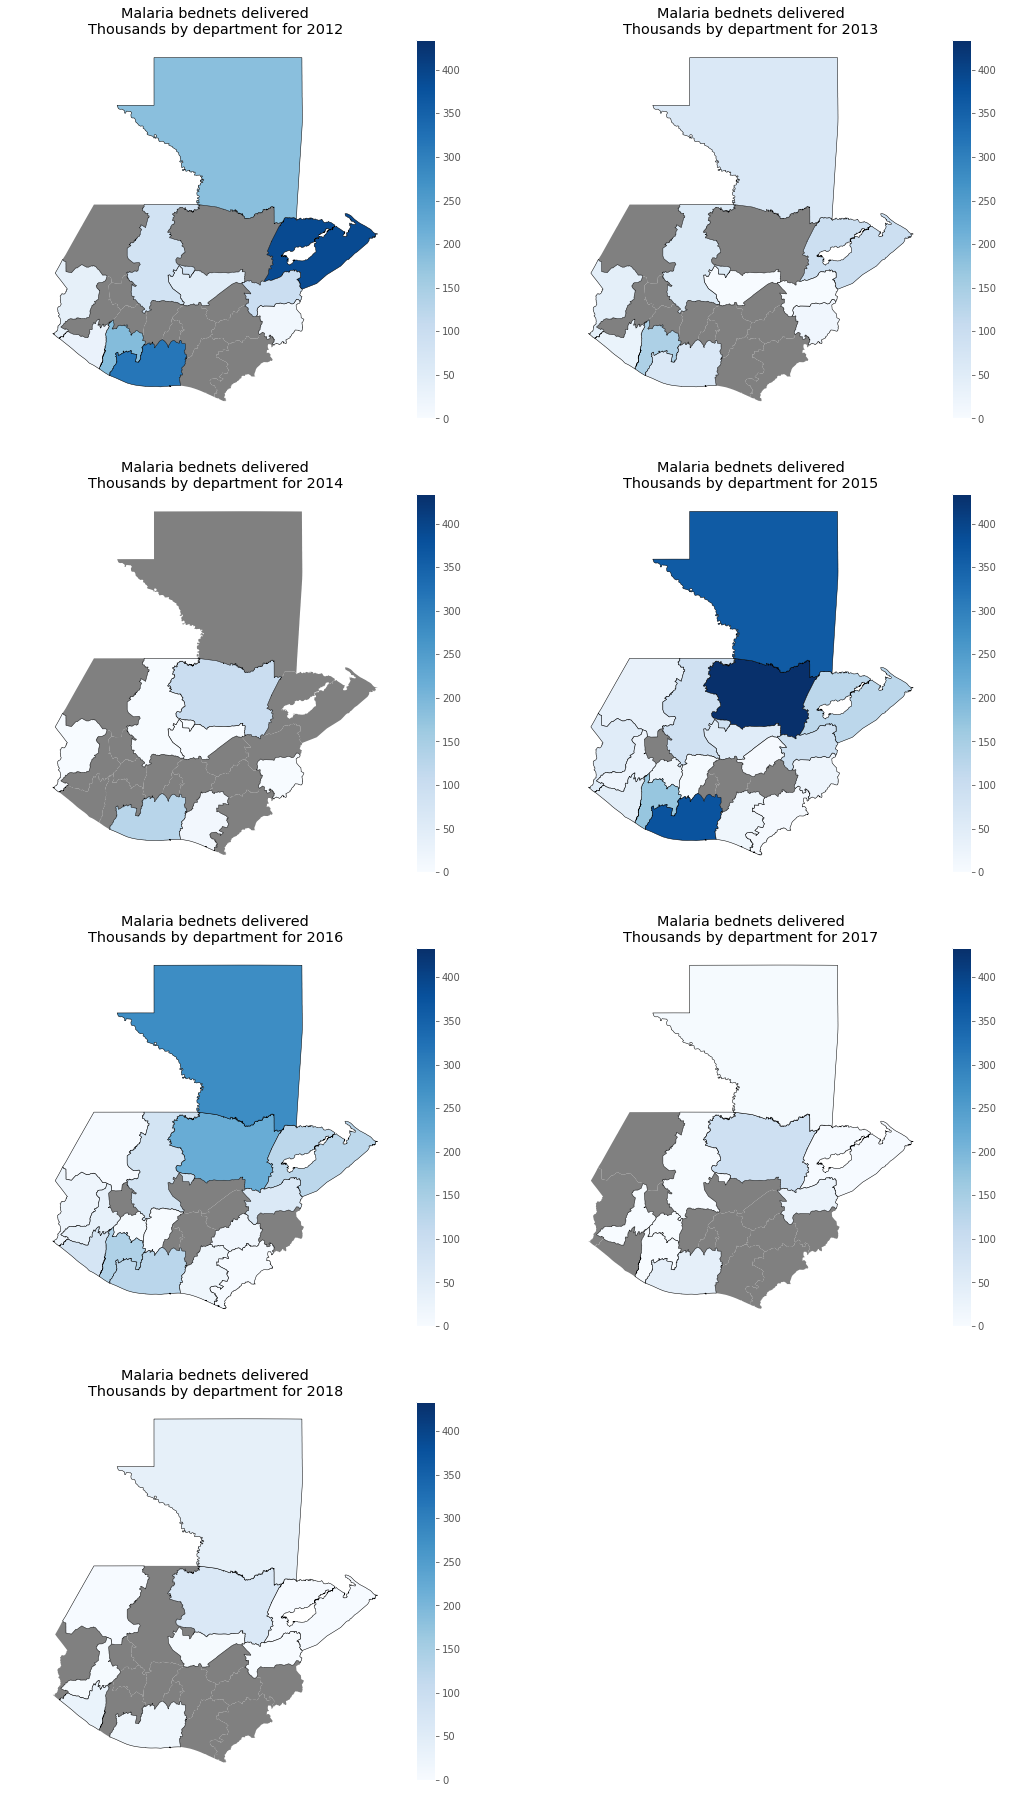

In [251]:
vmax = pblYears[list(range(2012,2018))].max().max()

side = 8
n = 7
vmin = 0
#vmax = 8
f, axes = plt.subplots(int(np.ceil(n/2)), 2, figsize=(side*2*1.1, side*np.ceil(n/2) ))
i = 2012
for row in axes:
    for ax in row:
        if i not in pblYears:
            ax.axis("off")
            continue
        temp3 = deptos.merge(pblYears[[i, "deptocode"]], 
                             left_on="CODIGO", right_on = "deptocode", how="left" ).fillna(0)
        temp3[temp3[i] == 0].plot(ax=ax, color="grey")
        if sum(temp3[i] > 0) > 0:
            temp3[temp3[i] > 0].plot(i, ax = ax, cmap = "Blues", 
                                             legend=True, edgecolor="black",
                                             vmin = vmin, vmax = vmax)
        ax.axis('off')
        ax.set_title("Malaria bednets delivered\nThousands by department for "+ str(i))
        i += 1

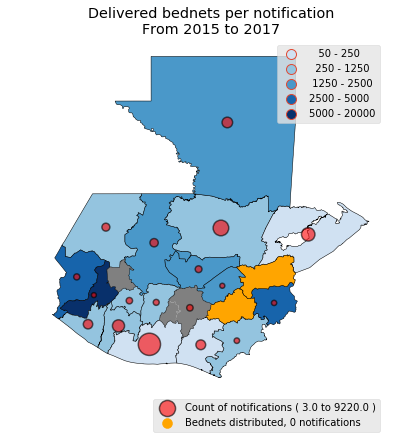

In [318]:
bn_over_notifs = bednetsYears[[2015,2016,2017]].sum(axis=1).divide(notifsYear[[2015,2016,2017]]\
                    .sum(axis=1).reindex(bednetsYears.index).fillna(0))\
                    .reset_index()
bn_over_notifs.columns = ["deptocode", "_i"]
bn_over_notifs["i"] = pd.cut(bn_over_notifs._i, bins = [0,1,50,250,1250,2500, 5000,20000,25000], 
                          labels = ["    0 - 1", "    1 - 50", "   50 - 250", "  250 - 1250", " 1250 - 2500", "2500 - 5000", 
                                    "5000 - 20000", "5000-25000"])
mlp.rcParams['figure.figsize'] = [6.2, 6.2]
temp = deptos.merge(bn_over_notifs.assign(deptocode=lambda x: (x.deptocode * 100).astype(int).astype(str)\
                                 .map(lambda y: y if y != "100" else "101")), 
                     left_on="CODIGO", right_on = "deptocode", how="left" )
ax = temp[temp.i.isna()].plot(color="grey") 
    
temp[temp.i.isna()==False].plot("i", ax=ax, vmin = -1,
                                legend=True, edgecolor="black", categorical = True, cmap = "Blues")
temp2 = deptos.merge(notifsYear[[2015,2016,2017]].sum(axis=1,skipna=True).rename("values").reset_index()\
                     .assign(deptocode=lambda x: (x.deptocode * 100).astype(int).astype(str)\
                     .map(lambda y: y if y != "100" else "101")), 
                     left_on="CODIGO", right_on = "deptocode", how="left" )\
    .assign(x = lambda row: row.geometry.centroid.x)\
    .assign(y = lambda row: row.geometry.centroid.y)
l1 = ax.get_legend()

plt.scatter(temp2.x, temp2.y, np.sqrt(temp2["values"])*5+15, c = "red", alpha=0.6, linewidths=1.5, edgecolors="black", 
            label = "Count of notifications ( " + str(temp2["values"].min()) + " to " + str(temp2["values"].max()) + " )")
if sum(np.isinf(temp._i)) > 0:
    # Departments with distr. of bednets but no registered Malaria cases.
    temp[np.isinf(temp._i)].plot(ax = ax, color="orange", edgecolors="black")  
plt.scatter([],[], 100, c="orange", label = "Bednets distributed, 0 notifications")
plt.legend(bbox_to_anchor=(1,0))
plt.gca().add_artist(l1)
plt.axis("off")
#ax.legend(ax.legend().get_ labels=["a", "n", "c", "d"])
plt.title("Delivered bednets per notification\nFrom 2015 to 2017")
plt.tight_layout()

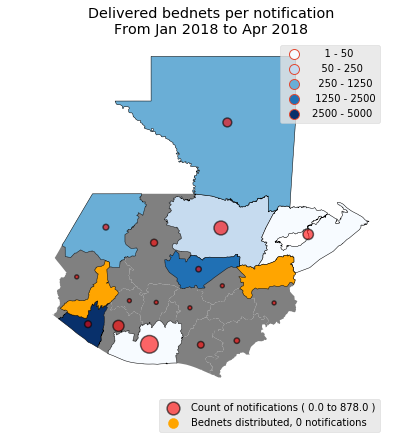

In [326]:
bn_over_notifs = bednetsYears[[2018]].sum(axis=1).divide(notifsYear[[2018]]\
                    .sum(axis=1).reindex(bednetsYears.index).fillna(0))\
                    .reset_index()
bn_over_notifs.columns = ["deptocode", "_i"]
bn_over_notifs["i"] = pd.cut(bn_over_notifs._i, bins = [0,1,50,250,1250,2500, 5000,20000,25000], 
                          labels = ["    0 - 1", "    1 - 50", "   50 - 250", "  250 - 1250", " 1250 - 2500", "2500 - 5000", 
                                    "5000 - 20000", "5000-25000"])
mlp.rcParams['figure.figsize'] = [6.2, 6.2]
temp = deptos.merge(bn_over_notifs.assign(deptocode=lambda x: (x.deptocode * 100).astype(int).astype(str)\
                                 .map(lambda y: y if y != "100" else "101")), 
                     left_on="CODIGO", right_on = "deptocode", how="left" )
ax = temp[temp.i.isna()].plot(color="grey") 
    
temp[temp.i.isna()==False].plot("i", ax=ax, vmin = 0,
                                legend=True, edgecolor="black", categorical = True, cmap = "Blues")
temp2 = deptos.merge(notifsYear[[2018]].sum(axis=1,skipna=True).rename("values").reset_index()\
                     .assign(deptocode=lambda x: (x.deptocode * 100).astype(int).astype(str)\
                     .map(lambda y: y if y != "100" else "101")), 
                     left_on="CODIGO", right_on = "deptocode", how="left" )\
    .assign(x = lambda row: row.geometry.centroid.x)\
    .assign(y = lambda row: row.geometry.centroid.y)
l1 = ax.get_legend()

plt.scatter(temp2.x, temp2.y, np.sqrt(temp2["values"])*10+15, c = "red", alpha=0.6, linewidths=1.5, edgecolors="black", 
            label = "Count of notifications ( " + str(temp2["values"].min()) + " to " + str(temp2["values"].max()) + " )")
if sum(np.isinf(temp._i)) > 0:
    # Departments with distr. of bednets but no registered Malaria cases.
    temp[np.isinf(temp._i)].plot(ax = ax, color="orange", edgecolors="black")  
plt.scatter([],[], 100, c="orange", label = "Bednets distributed, 0 notifications")
plt.legend(bbox_to_anchor=(1,0))
plt.gca().add_artist(l1)
plt.axis("off")
#ax.legend(ax.legend().get_ labels=["a", "n", "c", "d"])
plt.title("Delivered bednets per notification\nFrom Jan 2018 to Apr 2018")
plt.tight_layout()

(Propuesta de Jorge: Correlación entre diferencia de casos de 1 año con el anterior partido las bednets distribuidas en el año anterior. Para cada año)


In [89]:
def compareYears(ax, year, lagb = 1, lagn = 1):
    plt.xscale("log", basex=10)
    #plt.yscale("log", basey=10)
    notifsdiff = notifsYear[year].reindex(list(range(1,23))).sort_index().fillna(0).divide(\
                notifsYear[year-lagn].reindex(list(range(1,23))).sort_index().fillna(0) )
    bednetsprev = bednetsYears[year - lagb].reindex(list(range(1,23))).sort_index().fillna(0)
    plt.scatter(bednetsprev,  notifsdiff)
    #corr = np.corrcoef([bednetsprev, notifsdiff])
    #plt.text(0.05,0.9, "Correlation = "+str(corr[1][0]), transform=ax.transAxes)
    plt.ylabel("Relation of notifications \nbetween years \n " + str(year) + "/"+ str(year-lagn) )
    plt.xlabel("Bednets in "+ str(year-lagb) )
    #plt.ylim(0.1, 100)
    plt.xlim(0.5, 100*bednetsprev.max())
    return notifsdiff, bednetsprev

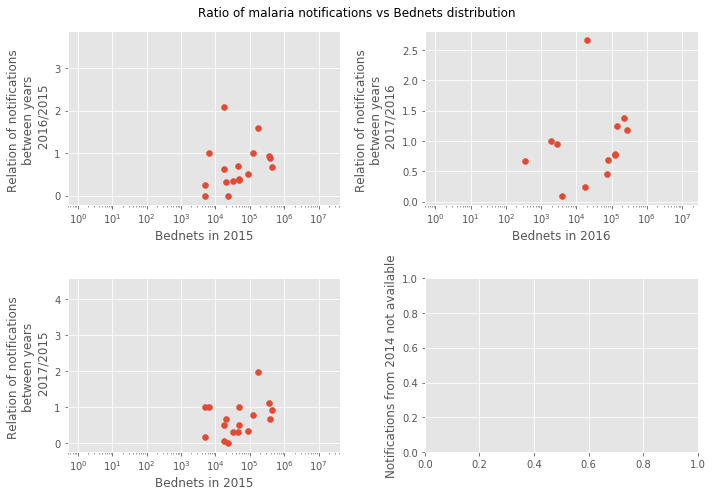

In [95]:
mlp.rcParams['figure.figsize'] = [10, 7]
ax = plt.subplot(2,2,1)
compareYears(ax, 2016, lagb = 1, lagn = 1)
ax = plt.subplot(2,2,2)
data = compareYears(ax, 2017, lagb = 1, lagn = 1)
ax = plt.subplot(2,2,3)
data = compareYears(ax, 2017, lagb = 2, lagn = 2)
ax = plt.subplot(2,2,4)
plt.ylabel("Notifications from 2014 not available")
plt.suptitle("Ratio of malaria notifications vs Bednets distribution")
plt.tight_layout(rect=(0, 0, 1, 0.96))

In [359]:
notifs.columns

Index(['AREA', 'DISTRITO', 'LOCALIDAD', 'NOMBRE', 'EDAD', 'GENERO',
       'FECHA INICIO SINTOMAS', 'FECHA TOMA DE MUESTRA',
       'FECHA RECEPCIÓN LABORATORIO', 'FECHA DE DIANÓSTICO',
       'INICIO TRATAMIENTO', 'FIN DE TRATAMIENTO', 'TIPO MALARIA',
       'SEMANA EPIDEMIOLÓGICA', 'TIPO DE MUESTRA', 'EMBARAZADA',
       'DENSIDAD PARASITARIA', 'Gametocitos', 'EMBARAZADA.1', 'Sintytom',
       'tomydiag', 'diagytrat', 'sinytrat', 'Año', 'Sintydiag', 'deptocode'],
      dtype='object')

In [583]:
def clean(x):
    try: 
        return x.strip().lower()
    except:
        return np.NaN
notifs["GENERO"] = notifs["GENERO"].apply(clean)
notifs["Gender"] = notifs.GENERO.map(lambda x: "Male" if x == "m" else "Female" if x == "f" else np.NaN)
notifs["Year"] = notifs["FECHA TOMA DE MUESTRA"].map(lambda y: y.year)

In [555]:
notifs.Gender.value_counts(dropna=False)

Male      8269
Female    7419
NaN         95
Name: Gender, dtype: int64

In [619]:
def age_groups(x):
    if x < 40:
        x = np.floor(x/5)*5
        return str(int(x)) + " - " + str(int(x+5))  
    elif x < 60:
        return "40 - 60"
    else:
        return "60 - 100"

In [620]:
d = notifs[(notifs.GENERO!="d") & (notifs.EDAD < 100) & (notifs.deptocode==5)
          ]\
        .assign(AgeGroup = lambda x: x.EDAD.map(age_groups)).groupby(["AgeGroup","GENERO", "deptocode"]).deptocode.count()\
    .rename("Cases").reset_index()

Text(0.5,1,'Malaria - Gender differences by age and department\nNotifications from 2015 to Apr 2018')

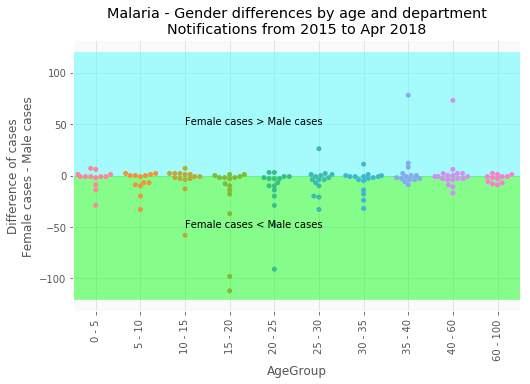

In [621]:
d = notifs[(notifs.GENERO!="d") & (notifs.EDAD < 100)
          ]\
        .assign(AgeGroup = lambda x: x.EDAD.map(age_groups)).groupby(["AgeGroup","GENERO", "deptocode"]).deptocode.count()\
    .rename("Cases").unstack(1).fillna(0)
mlp.rcParams['figure.figsize'] = [8, 5]
d = (d.f - d.m).rename("Female-Male").reset_index()
sb.swarmplot("AgeGroup", "Female-Male", data = d, order=[str(x) + " - " + str(x+5) for x in range(0,40, 5)] + ["40 - 60", "60 - 100"]) 
plt.fill_between([-1,10], [0, 0], [120,120], color="#52fcff", alpha = 0.5)
plt.fill_between([-1,10], [0, 0], [-120,-120], color="#14ff1c", alpha = 0.5)
plt.grid(True, "both", color="#dedede")
plt.rcParams['axes.facecolor'] = '#fafafa'
plt.xticks(rotation=90)
plt.ylabel("Difference of cases\nFemale cases - Male cases")
plt.text(2, 50, "Female cases > Male cases")
plt.text(2, -50, "Female cases < Male cases")
plt.title("Malaria - Gender differences by age and department\nNotifications from 2015 to Apr 2018")

Text(0.5,1,'Malaria: \nPercentage of delays that are less than 3 days long')

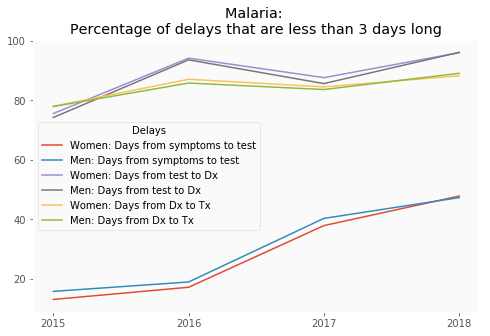

In [612]:
d = notifs[(notifs.GENERO!="d") & (notifs.EDAD < 100) & (notifs.Year > 2014)
          ].groupby(["Gender", "Year"]).agg({
    'Sintytom': lambda x: 100*sum(x<=3)/len(x), 
    'tomydiag': lambda x: 100*sum(x<=3)/len(x), 
    'diagytrat': lambda x: 100*sum(x<=3)/len(x)
}).unstack(0)
plt.plot(d) 
plt.legend(labels=["Women: Days from symptoms to test", 
                   "Men: Days from symptoms to test", 
                   "Women: Days from test to Dx",
                   "Men: Days from test to Dx",
                   "Women: Days from Dx to Tx",
                   "Men: Days from Dx to Tx"], title="Delays")
plt.grid()
plt.xticks([2015, 2016, 2017, 2018], [2015,2016,2017,2018])
plt.title("Malaria: \nPercentage of delays that are less than 3 days long")

Text(0.5,0,'Year')

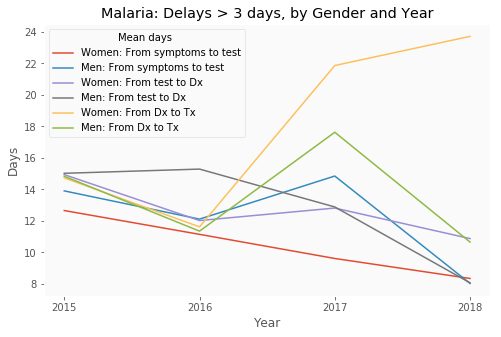

In [615]:
d = notifs[(notifs.GENERO!="d") & (notifs.EDAD < 100) & (notifs.Year > 2014)
          ].groupby(["Gender", "Year"]).agg({
    'Sintytom': lambda x: np.mean(x[x>3]), 
    'tomydiag': lambda x: np.mean(x[x>3]), 
    'diagytrat': lambda x: np.mean(x[x>3])
}).unstack(0)
d2 = notifs[(notifs.GENERO!="d") & (notifs.EDAD < 100) & (notifs.Year > 2014)
          ].groupby(["Gender", "Year"]).agg({
    'Sintytom': lambda x: sum(x>3), 
    'tomydiag': lambda x: sum(x>3), 
    'diagytrat': lambda x: sum(x>3)
}).unstack(0)
plt.plot(d) 
plt.legend(labels=["Women: From symptoms to test", 
                   "Men: From symptoms to test", 
                   "Women: From test to Dx",
                   "Men: From test to Dx",
                   "Women: From Dx to Tx",
                   "Men: From Dx to Tx"], title="Mean days ")
plt.grid()
plt.xticks([2015, 2016, 2017, 2018], [2015,2016,2017,2018])
plt.title("Malaria: Delays > 3 days, by Gender and Year")
plt.ylabel("Days")
plt.xlabel("Year")

In [610]:
d2

Sintytom         tomydiag        diagytrat       
Gender   Female    Male   Female   Male    Female   Male
Year                                                    
2015.0    385.0   517.0    624.0  726.0     164.0  193.0
2016.0   1105.0  1252.0    121.0  155.0     138.0  167.0
2017.0    889.0   989.0    236.0  309.0     129.0  137.0
2018.0    323.0   349.0     25.0   27.0      52.0   53.0

In [608]:
notifs.Year.value_counts()

2015.0    5411
2016.0    4800
2017.0    4089
2018.0    1463
2014.0       4
Name: Year, dtype: int64